In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
%load_ext autoreload
%autoreload 2

In [2]:
data_path = "/Users/wenyuanchen/Desktop/IBM/IBM_Tumor_Project/ori_reso_all_dataset.npy"
label_path = "/Users/wenyuanchen/Desktop/IBM/IBM_Tumor_Project/ori_reso_all_labels.npy"
data = np.load(data_path, allow_pickle=True)
label = np.load(label_path, allow_pickle=True)

In [18]:
def show_block(data = data, label = label, pos = True, scale_up = False):
    neg_label = np.where(label == 0)[0]
    pos_label = np.where(label == 1)[0]
    neg_label_idx = np.random.choice(neg_label, 1)
    pos_label_idx = np.random.choice(pos_label, 1)
    # Maximum Intensity Projection along each axis
    if pos:
        block = data[pos_label_idx].astype(float)[0]
    else:
        block = data[neg_label_idx].astype(float)[0]
    if scale_up:
        block_scaleup = scale_up_block(block)
    mip_x = np.max(block, axis=0) # X-axis projection
    mip_y = np.max(block, axis=1) # Y-axis projection
    mip_z = np.max(block, axis=2) # Z-axis projection

    mip_x_scaleup = np.max(block_scaleup, axis=0) # X-axis projection
    mip_y_scaleup = np.max(block_scaleup, axis=1) # Y-axis projection
    mip_z_scaleup = np.max(block_scaleup, axis=2) # Z-axis projection


    # Visualize the MIPs
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].imshow(mip_x, cmap='gray')
    axs[0].set_title('MIP - X axis (axial)')
    axs[0].axis('off')

    axs[1].imshow(mip_y, cmap='gray')
    axs[1].set_title('MIP - Y axis (coronal)')
    axs[1].axis('off')

    axs[2].imshow(mip_z, cmap='gray')
    axs[2].set_title('MIP - Z axis (sagittal)')
    axs[2].axis('off')
    plt.show()
    
    if scale_up:
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))

        axs[0].imshow(mip_x_scaleup, cmap='gray')
        axs[0].set_title('MIP - X axis (axial)')
        axs[0].axis('off')

        axs[1].imshow(mip_y_scaleup, cmap='gray')
        axs[1].set_title('MIP - Y axis (coronal)')
        axs[1].axis('off')

        axs[2].imshow(mip_z_scaleup, cmap='gray')
        axs[2].set_title('MIP - Z axis (sagittal)')
        axs[2].axis('off')
        plt.show()


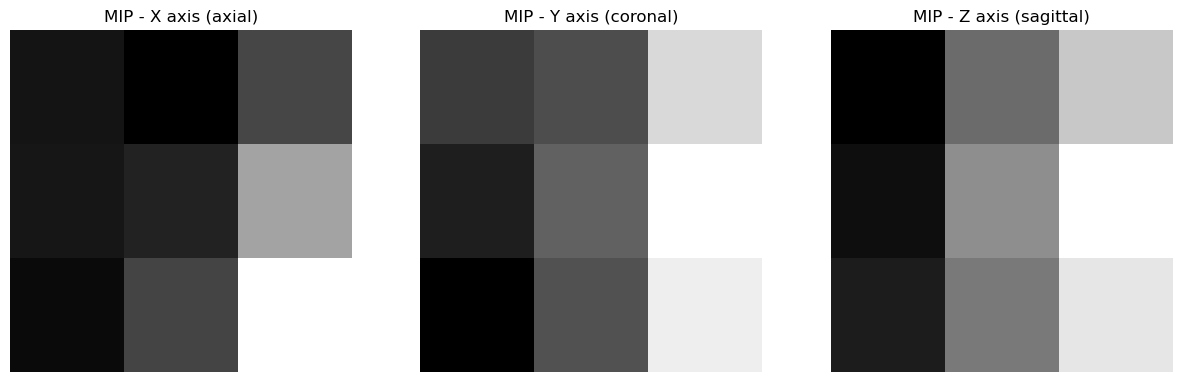

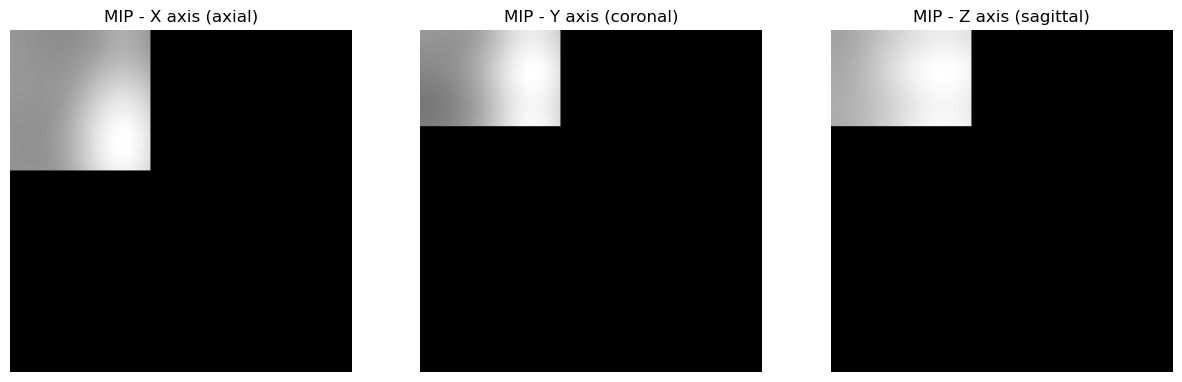

In [19]:
show_block(pos = True, scale_up = True)

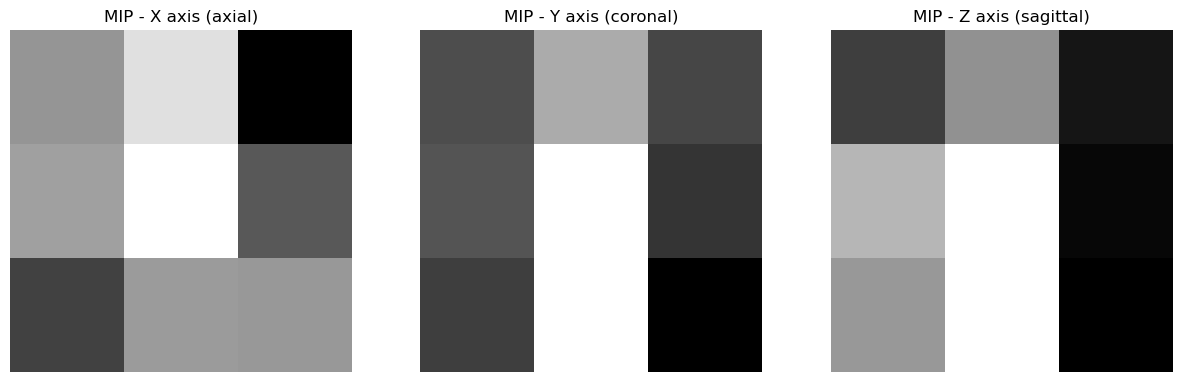

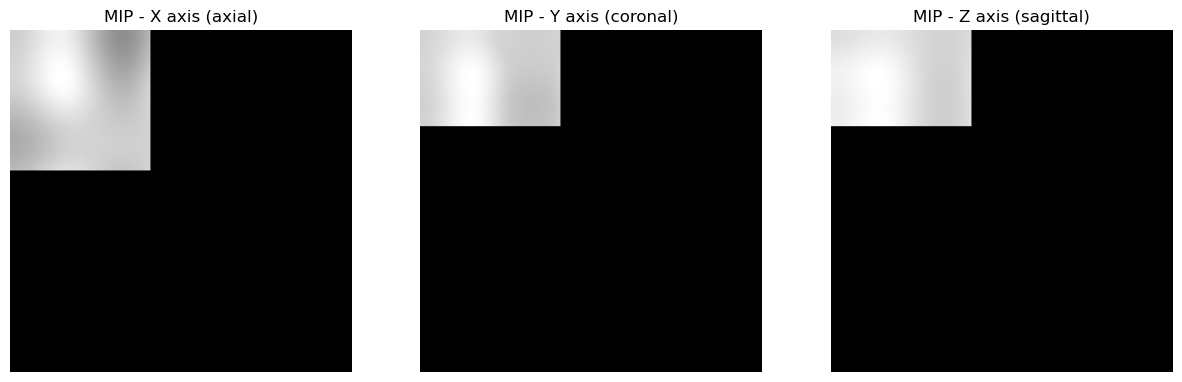

In [10]:
show_block(pos = False, scale_up = True)

In [15]:
import SimpleITK as sitk
import numpy as np

def scale_up_block_new(block, spacing = (2.0364201068878174, 2.0364201068878174, 3.0) ):
    # Convert the block to a SimpleITK image
    block_image = sitk.GetImageFromArray(block)
    block_image.SetSpacing(spacing)

    # Upsample the block using cubic interpolation
    resampler = sitk.ResampleImageFilter()
    resampler.SetInterpolator(sitk.sitkBSpline)
    resampler.SetOutputSpacing(block_image.GetSpacing())
    resampler.SetSize((224, 224, 224))

    upsampled_block = resampler.Execute(block_image)
    # Get the upsampled block as a NumPy array
    upsampled_block_array = sitk.GetArrayFromImage(upsampled_block)
    return upsampled_block_array